In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
dfi = pd.read_parquet('../../data/data2analyze_clean.parquet', engine='pyarrow')
dfi = dfi.drop(columns=['last_price', 'longitude', 'latitude', 'tyear_start', 'tmonth_start', 'tquarter_start', 'id'])

In [3]:
pd.options.display.max_columns = 100
dfi.head()

,marketplace,first_observed_date,last_observed_date,time2event,event,id_sepomex,listing_type,property_type,is_development,is_exterior,is_penthouse,first_price,surface_total,num_bathrooms,num_parking_lots,num_bedrooms,cost_of_maintenance,is_new_property_prob,prediction_price,prediction_price_per_square_meter,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area,pets_allowed,page_on_marketplace,seller,available_secondary,delta_available_secondary,available_primary,delta_available_primary,anual_inflation,pnea_deseasonalized,pnea,tiie,median_cap_rate,capital_gain,delta_capital_gain,bin_group_marketplace,woe_marketplace,bin_group_seller,woe_seller,bin_group_id_sepomex,woe_id_sepomex,diff_first_prediction,sine_tmonth,cosine_tmonth
0,inmuebles24,2022-09-05 01:18:27,2023-10-09 16:08:16,406,0,11457.0,for-sale,apartment,0,0.0,0.0,1921000.0,56.0,1.0,1.0,2.0,0.0,0.690521,1.997960e+06,35677.861082,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,45.0,M&M Consultores Inmobiliarios,7.0,0.166667,22.0,1.75,8.7,3.123571,3.15845,8.59,0.045304,1.615217,0.011749,group_1,0.236351,group_1,-0.680941,group_4,0.605248,-0.038519,-1.0,-1.836970e-16
1,inmuebles24,2022-09-07 02:45:14,2023-10-09 16:08:12,404,0,11489.0,for-sale,apartment,0,0.0,0.0,4000000.0,79.0,2.0,2.0,3.0,0.0,0.782498,3.423776e+06,43338.930420,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,36.0,Hello House,16.0,0.230769,16.0,0.00,8.7,3.123571,3.15845,8.59,0.059438,1.511583,-0.016600,group_1,0.236351,group_2,-0.027409,group_3,0.176708,0.168301,-1.0,-1.836970e-16
2,viva_anuncios,2022-09-06 09:02:56,2023-06-04 04:03:57,270,1,11489.0,for-sale,apartment,0,0.0,0.0,3450000.0,84.0,2.0,2.0,3.0,0.0,0.875950,3.591863e+06,42760.277882,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,Alfa Inmobiliaria Atlántica,16.0,0.230769,16.0,0.00,8.7,3.123571,3.15845,8.59,0.059438,1.511583,-0.016600,group_2,0.315101,group_4,2.694640,group_3,0.176708,-0.039496,-1.0,-1.836970e-16
3,inmuebles24,2022-09-29 03:22:32,2023-10-09 16:07:54,382,0,11489.0,for-sale,apartment,0,0.0,0.0,2790000.0,67.0,2.0,1.0,2.0,0.0,0.866178,2.873411e+06,42886.737821,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,others,16.0,0.230769,16.0,0.00,8.7,3.123571,3.15845,8.59,0.059438,1.511583,-0.016600,group_1,0.236351,group_2,-0.027409,group_3,0.176708,-0.029029,-1.0,-1.836970e-16
4,viva_anuncios,2022-09-06 09:12:28,2023-05-30 04:08:38,265,1,others,for-sale,apartment,0,0.0,0.0,1590000.0,51.0,1.0,1.0,2.0,0.0,0.500391,1.687783e+06,33093.783019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,RE/MAX Consulting,1.0,inf,30.0,0.00,8.7,3.123571,3.15845,8.59,0.035881,1.615217,0.011749,group_2,0.315101,group_1,-0.680941,group_3,0.176708,-0.057936,-1.0,-1.836970e-16


In [4]:
dfi.dtypes

marketplace                                  object
first_observed_date                  datetime64[ns]
last_observed_date                   datetime64[ns]
time2event                                    int32
event                                         int64
id_sepomex                                   object
listing_type                                 object
property_type                                object
is_development                                int64
is_exterior                                 float64
is_penthouse                                float64
first_price                                 float64
surface_total                               float64
num_bathrooms                               float64
num_parking_lots                            float64
num_bedrooms                                float64
cost_of_maintenance                         float64
is_new_property_prob                        float64
prediction_price                            float64
prediction_p

In [5]:
correlaciones = dfi.corr()

In [6]:
correlaciones

,time2event,event,is_development,is_exterior,is_penthouse,first_price,surface_total,num_bathrooms,num_parking_lots,num_bedrooms,cost_of_maintenance,is_new_property_prob,prediction_price,prediction_price_per_square_meter,has_balcony,has_elevator,has_garden,has_gym,has_luxury_features,has_pool,has_studio,has_surveillance,has_terrace,has_visitors_parking,has_washing_area,pets_allowed,page_on_marketplace,available_secondary,delta_available_secondary,available_primary,delta_available_primary,anual_inflation,pnea_deseasonalized,pnea,tiie,median_cap_rate,capital_gain,delta_capital_gain,woe_marketplace,woe_seller,woe_id_sepomex,diff_first_prediction,sine_tmonth,cosine_tmonth
time2event,1.000000,-0.119471,0.036342,-0.013100,0.028472,0.022585,0.020993,0.067669,0.044495,0.042519,-0.001812,0.064882,0.337357,0.347865,0.028084,0.047984,0.030505,0.040449,-0.011998,0.020704,0.017193,0.063709,0.081275,-0.010776,-0.014257,-0.008549,0.273287,-0.184914,0.275516,0.012451,-0.016578,0.779587,0.728907,0.854646,-0.839878,0.067809,-0.069799,0.122553,-0.092817,-0.071737,-0.022443,0.010972,0.031335,0.178605
event,-0.119471,1.000000,-0.047503,-0.001647,-0.015500,0.001730,-0.026372,-0.040371,-0.026884,-0.016240,0.003424,-0.032646,-0.097198,-0.104959,-0.026789,-0.031198,-0.009640,-0.031134,-0.001624,-0.028036,-0.014879,-0.033526,-0.039244,0.017463,0.012627,-0.011976,0.050224,-0.057373,0.117239,-0.028196,0.000175,0.251858,0.176505,0.173654,-0.096321,0.002173,-0.032716,0.056370,0.236355,0.238952,0.113701,-0.050831,0.364998,-0.160943
is_development,0.036342,-0.047503,1.000000,-0.011572,0.002193,-0.001032,-0.037442,-0.017642,-0.081237,-0.022006,-0.000455,0.081027,0.020833,0.073956,0.002772,0.002432,-0.005646,0.010210,0.350974,-0.014782,-0.020018,0.001730,0.029560,-0.004076,-0.033916,-0.036723,0.012035,0.001059,0.001880,0.030805,-0.000651,0.009710,-0.012775,-0.001945,0.007695,0.004404,0.007558,0.008220,-0.049529,-0.011907,-0.013161,0.024000,0.024582,0.002445
is_exterior,-0.013100,-0.001647,-0.011572,1.000000,-0.004687,-0.002569,-0.045021,-0.031307,-0.032034,-0.030474,-0.000974,0.028750,-0.013689,0.017203,0.084062,0.069898,-0.037774,-0.021391,-0.004267,-0.023682,-0.009762,0.031839,0.001548,-0.012912,0.036886,0.011151,0.014752,0.017035,-0.014333,0.033486,-0.002783,-0.010472,-0.010230,-0.011721,0.009824,-0.004897,-0.024513,0.006433,0.001913,-0.001678,-0.011586,-0.007998,-0.009148,0.002183
is_penthouse,0.028472,-0.015500,0.002193,-0.004687,1.000000,-0.002667,0.061463,0.075873,0.058840,0.012604,0.000622,0.096187,0.052730,0.031809,0.089911,0.083205,-0.020729,0.008103,0.002897,-0.011448,0.013093,0.058915,0.174423,-0.003977,0.005859,0.021177,0.025560,0.052214,-0.015959,0.027462,-0.005594,0.020605,0.020804,0.022876,-0.023294,-0.007178,-0.054674,-0.005851,-0.022912,-0.016260,-0.019208,0.028701,-0.005674,0.007942
first_price,0.022585,0.001730,-0.001032,-0.002569,-0.002667,1.000000,-0.003084,-0.001752,-0.004682,-0.002632,-0.000084,0.001638,0.005048,0.010684,0.004664,-0.003049,-0.006899,0.001169,-0.000611,-0.004037,-0.003683,-0.000581,0.004209,-0.001489,-0.001525,-0.007246,0.018338,-0.004240,0.003196,-0.000431,-0.000771,0.014856,0.010656,0.017002,-0.016130,-0.001326,0.000196,0.006880,0.006023,-0.002588,-0.004762,0.001142,-0.007442,0.002853
surface_total,0.020993,-0.026372,-0.037442,-0.045021,0.061463,-0.003084,1.000000,0.665886,0.655041,0.570152,-0.001127,-0.245268,0.208803,-0.211885,-0.032281,-0.178034,0.231923,-0.043296,-0.015173,0.012106,0.188415,-0.041914,0.095374,0.011748,-0.032761,-0.042533,-0.064881,0.088030,-0.001953,-0.154739,-0.010549,0.012269,0.003413,0.007806,-0.007183,-0.035806,-0.091602,-0.090848,0.014953,-0.018252,-0.041264,0.017836,0.007729,0.004981
num_bathrooms,0.067669,-0.040371,-0.017642,-0.031307,0.075873,-0.001752,0.665886,1.000000,0.564636,0.619799,-0.000275,-0.070979,0.303588,-0.056032,0.041081,-0.057178,0.192139,0.031445,-0.002730,0.068583,0.169754,0.053333,0.137467,0.027171,-0.001215,-0.015783,-0.030294,0.081269,-0.014338,-0.095696,-0.015177,0.05066

<AxesSubplot:>

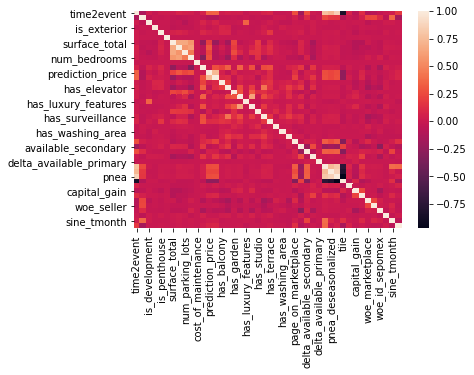

In [7]:
sns.heatmap(correlaciones)

<AxesSubplot:>

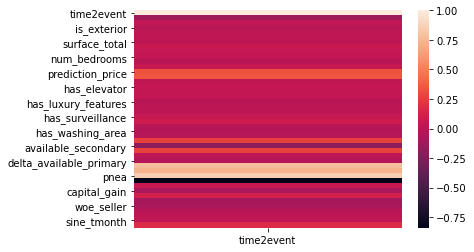

In [8]:
sns.heatmap(correlaciones[['time2event']])

In [10]:
model = ols('time2event ~ bin_group_seller  + property_type + bin_group_id_sepomex + bin_group_marketplace + marketplace + listing_type', data = dfi).fit() #Oridnary least square method
result_anova = sm.stats.anova_lm(model) # ANOVA Test
result_anova

,df,sum_sq,mean_sq,F,PR(>F)
bin_group_seller,4.0,7.925854e+06,1.981463e+06,229.387179,2.401769e-196
property_type,1.0,1.224759e+06,1.224759e+06,141.786153,1.143258e-32
bin_group_id_sepomex,4.0,9.575982e+05,2.393995e+05,27.714458,4.928320e-23
bin_group_marketplace,2.0,1.777994e+07,8.889971e+06,1029.161242,0.000000e+00
marketplace,7.0,2.095030e+07,2.992899e+06,346.477612,0.000000e+00
listing_type,1.0,1.192937e+08,1.192937e+08,13810.214572,0.000000e+00
Residual,94076.0,8.126355e+08,8.638074e+03,NaN,NaN
